# Kaggle Competition Salary Classification

The major goal of this assignment is to gain insights into career paths that could get you a high salary in the field of data science. We will be using the "2018 Kaggle ML & DS Survey" data to perform supervised machine learning algorithm (logistic regression) to make a prediction on which salary bracket a person belongs to depending on the answers they have provided in the survey. 

As part of the analysis, we will be doing the following:

1. Data Cleaning
2. Explanatory Data Analysis
3. Feature selection
4. Model implementation
5. Model tuning
6. Testing & Discussion

The questions asked in the assignment shall be answered throughout the notebook. The questions will be bolded.

### Install Relevant Libraries
First, we will install the relevant libraires required to run the following code

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib.pyplot
!pip insteall seaborn
!pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
ERROR: unknown command "insteall" - maybe you meant "install"



You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Import Relevant Libaries

In [1]:
import numpy as np
import pandas as pd

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import linear_model

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Graph Functions

In [3]:
#Define Plots with Order Specified 
def countplot(x, data, order, rotate_text):
    plt.figure(figsize=(18,6))
    sns.set(style="darkgrid")
    ax= sns.countplot(x=x, data=data, order = order)
    if rotate_text==1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

def barplot(x, y, data, order,rotate_text):
    plt.figure(figsize=(12,6))
    ax = sns.barplot(x=x, y = y, data=data, order = order)
    if rotate_text == 1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()

def boxplot(x,y,data,order, rotate_text):
    plt.figure(figsize=(12,6))
    ax = sns.boxplot(x= x, y = y, data = data, order = order, showfliers=False)
    if rotate_text == 1:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()    

## Read in Data

In [ ]:
import pandas as pd
import random 
df = pd.read_csv("multipleChoiceResponses.csv", low_memory = False)

In [6]:
len(df['Q1'].unique())

5

In [7]:
df.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [8]:
Questions = df.iloc[0,:]
Salaries = df.iloc[1:, :]

In [9]:
Salaries.shape

(23859, 395)

## 1.0 Basic Data Cleaning

This dataset is really messy with lots of NaN values. We will go through the data to handle the missing values and make the data more suited for modelling.  

### 1.1 Drop Rows with No Values in Target Variable

Before we look into the dataset, we will firstly drop all the rows of our target variable with either missing values or undisclosed salary.

In [10]:
Salaries.dropna(subset=['Q9'],inplace=True) 
Salaries.Q9.unique() 

array(['10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000'], dtype=object)

In [11]:
Salaries = Salaries[Salaries['Q9']!= "I do not wish to disclose my approximate yearly compensation"]

In [12]:
Salaries['Q9'].isnull().sum()

0

### 1.2 Drop everyone that took less than 3 minutes to complete the survey

In a 50 question survey, it's unlikely that a person that spent less than 3 minutes is going to provide us with good data. Due to this, I will be dropping everyone that took less than 3 minutes to complete the survey.

In [13]:
mins3 = Salaries[Salaries.iloc[:,0].astype(int) <= 180].index
Salaries = Salaries.drop (mins3, axis = 0)

In [14]:
Salaries.shape

(14707, 395)

### 1.3 Drop everyone that decided not to disclose

Less than 1% of the respondent did not disclose information either on gender, country of residence or education. Hence, we will be dropping everyone that did not disclose the information.

In [15]:
Salaries['Q1'].value_counts(normalize = True)

Male                       0.834637
Female                     0.154212
Prefer not to say          0.007819
Prefer to self-describe    0.003332
Name: Q1, dtype: float64

In [16]:
Salaries['Q3'].value_counts(normalize = True)

United States of America                                0.215068
India                                                   0.150609
China                                                   0.057252
Other                                                   0.044673
Russia                                                  0.038145
Brazil                                                  0.036037
Germany                                                 0.032977
United Kingdom of Great Britain and Northern Ireland    0.032298
Canada                                                  0.028082
France                                                  0.027470
Japan                                                   0.027402
Spain                                                   0.023662
Italy                                                   0.015843
Australia                                               0.014891
Poland                                                  0.014007
Netherlands              

In [17]:
Salaries['Q4'].value_counts(normalize = True)

Master’s degree                                                      0.474060
Bachelor’s degree                                                    0.280819
Doctoral degree                                                      0.166043
Some college/university study without earning a bachelor’s degree    0.036989
Professional degree                                                  0.025838
I prefer not to answer                                               0.008363
No formal education past high school                                 0.007887
Name: Q4, dtype: float64

In [18]:
#Drop rows with un-disclosed gender
undisclosed_genders = Salaries[(Salaries['Q1']=='Prefer not to say') | (Salaries['Q1']=='Prefer to self-describe')].index
Salaries = Salaries.drop (undisclosed_genders, axis = 0)

#Drop rows with un-disclosed country
undisclosed_country = Salaries[(Salaries['Q3']=='I do not wish to disclose my location')].index
Salaries = Salaries.drop (undisclosed_country, axis = 0)

#Drop rows with un-disclosed education
undisclosed_education = Salaries[(Salaries['Q4']=='I prefer not to answer')].index
Salaries = Salaries.drop (undisclosed_education, axis = 0)

### 1.4 Select Questions

As mentioned, this dataset is really messy and is going to take a very long time cleaning the entire dataset. To avoid this, I'm going to select the questions that I believe have great impact towards the target variable (Salary) and work around the selected questions. Further in this notebook, we will be reducing more features through feature selection, but for now, we will work with the selected questions.

### Selected Questions

* Q1: What is your gender?
* Q2: What is your age?
* Q3: In which country do you currently reside?
* Q4: What is the highest level of formal education that you have attained or plan to attain within the next 2 years? 
* Q5: Which best describes your undergraduate major?
* Q6: Select the title most similar to your current role (or most recent title if retired)
* Q7: In what industry is your current employer/contract (or your most recent employer if retired)
* Q8: How many years of experience do you have in your current role?
* Q11: Select any activities that make up an important part of your role at work
* Q12: What is the primary tool that you use at work or school to analyze data
* Q16: What programming languages do you use on a regular basis?
* Q17: What specific programming language do you use most often?
* Q19: What machine learning frameworks have you used in the past 5 years?
* Q24: How long have you been writing code to analyze data?
* Q29. Which of the following relational database products have you used at work or school in the last 5 years?
* Q30. Which of the following big data and analytics products have you used at work or school in the last 5 years?
* Q31. Which types of data do you currently interact with most often at work or school?

In [19]:
Questions = ['Q1', 'Q2', 'Q3','Q4','Q5','Q6', 'Q7', 'Q8', 'Q9', 'Q11', 'Q12', 'Q16', 'Q17', 'Q19', 'Q24', 'Q29', 'Q30', 'Q31']

In [20]:
#Drop all the columns of "OTHER_TEXT". 
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='OTHER_TEXT')))]

#Drop all the columns of "_Text"
Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex='_TEXT')))]

#Get all the columns associated with the selected questions
selected_columns = []
for x in Salaries.columns:
    if x.split('_')[0] in Questions: selected_columns.append(x)

Salaries = Salaries[selected_columns]

In [21]:
#Rename 'Q12_Multiple_CHOICE' to 'Q12'
Salaries.columns = ['Q12' if x=='Q12_MULTIPLE_CHOICE' else x for x in Salaries.columns]

### 1.5 Missing Data

**Question: For the data cleaning step, handle missing values however you see fit and justify your approach. Provide some insight on why you think the values are missing and how your approach might impact the overall analysis.** - Shall be answered for every feature

In [22]:
Salaries.isnull().sum()

Q1                 0
Q2                 0
Q3                 0
Q4                 0
Q5               110
Q6                 0
Q7                 0
Q8                69
Q9                 0
Q11_Part_1      7096
Q11_Part_2     10249
Q11_Part_3     10321
Q11_Part_4      8805
Q11_Part_5     10884
Q11_Part_6     11933
Q11_Part_7     13686
Q12              831
Q16_Part_1      3241
Q16_Part_2      9421
Q16_Part_3      8235
Q16_Part_4     12233
Q16_Part_5     11703
Q16_Part_6     11999
Q16_Part_7     13370
Q16_Part_8     11579
Q16_Part_9     12604
Q16_Part_10    13691
Q16_Part_11    14150
Q16_Part_12    14037
Q16_Part_13    13162
               ...  
Q30_Part_8     13984
Q30_Part_9     13495
Q30_Part_10    13330
Q30_Part_11    13827
Q30_Part_12    13986
Q30_Part_13    14151
Q30_Part_14    14218
Q30_Part_15    14266
Q30_Part_16    14110
Q30_Part_17    13609
Q30_Part_18    14090
Q30_Part_19    14118
Q30_Part_20    14176
Q30_Part_21    14266
Q30_Part_22    14212
Q30_Part_23    14253
Q30_Part_24  

### Missing Values in Q5: Which best describes your undergraduate major?

In [23]:
Salaries['Q5'].isnull().sum()

110

In [24]:
Salaries['Q5'].value_counts(normalize = True)

Computer science (software engineering, etc.)                    0.381442
Engineering (non-computer focused)                               0.163897
Mathematics or statistics                                        0.136792
A business discipline (accounting, economics, finance, etc.)     0.085398
Physics or astronomy                                             0.056111
Information technology, networking, or system administration     0.042453
Medical or life sciences (biology, chemistry, medicine, etc.)    0.040834
Other                                                            0.032878
Social sciences (anthropology, psychology, sociology, etc.)      0.027035
Humanities (history, literature, philosophy, etc.)               0.013729
Environmental science or geology                                 0.011757
I never declared a major                                         0.004083
Fine arts or performing arts                                     0.003591
Name: Q5, dtype: float64

Multiple choice answers for Q5 should capture most, if not all the options a person could describe their undergraduate major as. The only reason for missing value is the human error or not wanting to disclose.

For Q5, the mode isn't significant enough for us to simply impute the missing values to. If we impute the missing values to the mode, we may add more bias to the model especially in a variable that don't have a significant mode. Hence for Q5, we will simply drop the missing values as the number of missing values aren't significant. 

In [25]:
Salaries.dropna(subset=['Q5'],inplace=True) 

### Missing Values in  Q8: How many years of experience do you have in your current role?

In [26]:
Salaries['Q8'].isnull().sum()

68

In [27]:
Salaries['Q8'].value_counts()

0-1      3557
1-2      2611
5-10     1820
2-3      1816
3-4      1207
4-5      1049
10-15    1041
15-20     546
20-25     254
30 +      120
25-30     115
Name: Q8, dtype: int64

In [28]:
# Comparing Salary for rows with NaN years of experience
a = Salaries['Q9'].value_counts(normalize=True)
b = Salaries[Salaries['Q8'].isnull()]['Q9'].value_counts(normalize=True)
print (pd.DataFrame({'All data': a, 'NaN Years of Experience':b}))

             All data  NaN Years of Experience
0-10,000     0.279921                 0.808824
10-20,000    0.125176                 0.073529
100-125,000  0.055689                 0.014706
125-150,000  0.035835                      NaN
150-200,000  0.029992                      NaN
20-30,000    0.090467                 0.029412
200-250,000  0.011194                      NaN
250-300,000  0.004858                      NaN
30-40,000    0.072444                 0.044118
300-400,000  0.003239                      NaN
40-50,000    0.063292                 0.029412
400-500,000  0.001267                      NaN
50-60,000    0.059068                      NaN
500,000+     0.002675                      NaN
60-70,000    0.048437                      NaN
70-80,000    0.045621                      NaN
80-90,000    0.033723                      NaN
90-100,000   0.037102                      NaN


Multiple choice answers for Q8 should capture most, if not all the options a person could describe their undergraduate major as. The only reason for missing value is the human error or a person not wanting to disclose.

In the rows with missing values, it seems like most of the specified is 0-10,000. It will be discussed in more detail in EDA section, but years of experience definitely do have relationship with the yearly salary. Since most of our missing values specified 0-10,000 as their salary bracket, we will impute 0-1 years of experience on those missing values as they are the lowest values that each feature can have. 

This way, we can minimize the bias in our data/model while keeping these samples.

In [29]:
Salaries['Q8'].fillna('0-1',inplace=True)

### Missing Values in Q12: What is the primary tool that you use at work or school to analyze data


In [30]:
Salaries['Q12'].isnull().sum()

813

In [31]:
Salaries['Q12'].value_counts(normalize = True)

Local or hosted development environments (RStudio, JupyterLab, etc.)    0.502950
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       0.193040
Other                                                                   0.088492
Advanced statistical software (SPSS, SAS, etc.)                         0.079008
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                0.072138
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)    0.064372
Name: Q12, dtype: float64

The reason for null entries may be due to respondent simply wanting to answer or respondent not using any tool in general.

Based on the data, there are significant number of those that use local or hosted development environments as their primary tool compared to all the others. Therefore, we will convert our missing values to the mode. 

We are adding bias to our model by imputing the mode, but it won't be significant as it is clear that the value we are imputing to is dominant in frequency. 


In [32]:
Salaries['Q12'].fillna(Salaries['Q12'].mode()[0],inplace=True)

### Missing Values in Q17: What specific programming language do you use most often?



In [33]:
Salaries['Q17'].isnull().sum()

3448

In [34]:
Salaries['Q17'].value_counts(normalize = True)

Python                   0.530309
R                        0.139457
SQL                      0.090926
Java                     0.055876
C/C++                    0.041372
C#/.NET                  0.028542
Javascript/Typescript    0.027055
MATLAB                   0.022499
SAS/STATA                0.016456
PHP                      0.013016
Other                    0.008181
Visual Basic/VBA         0.008181
Scala                    0.007438
Bash                     0.003533
Ruby                     0.003533
Go                       0.003068
Julia                    0.000558
Name: Q17, dtype: float64

There are large group of null entires for Q17. This may be due to respondent simply not answering or respondent not using any programming language in general. I strongly believe that there is a potential for more optionality of this question. 

Based on the data, there are significant number of those that use Python as their primary language. Therefore, we will convert our missing values to the mode. 

We are adding bias to our model by imputing the mode, but it won't be significant as it is clear that the value we are imputing to is dominant in frequency. It will be better to add slight bias and keep these samples.


In [35]:
Salaries['Q17'].fillna('Unknown',inplace=True)

### Missing Values in Q24: How long have you been writing code to analyze data?


In [36]:
Salaries['Q24'].isnull().sum()

1179

In [37]:
Salaries['Q24'].value_counts(normalize = True)

1-2 years                                               0.283225
3-5 years                                               0.235777
< 1 year                                                0.217351
5-10 years                                              0.131977
10-20 years                                             0.067255
I have never written code but I want to learn           0.036315
20-30 years                                             0.017351
30-40 years                                             0.006142
40+ years                                               0.002917
I have never written code and I do not want to learn    0.001689
Name: Q24, dtype: float64

Multiple choice answers for Q24 should capture most, if not all the options a person could classify their years of experience in coding. The only reason for missing value is the human error or respondents not wanting to disclose.

In this feature, it may not be such a good idea to impute them to its mode based on the distribution of the feature. For this feature, we will create a categorical value "Unknown" since we are not losing any samples and not making any assumptions on features distribution.

In [38]:
Salaries['Q24'].fillna('Unknown',inplace=True)

### Missing Values in Q11, Q16, Q19, Q29, Q30 & Q31: Multiple Choice with Mutiple Answers

Questions 11, 16, 19, 29, 30 and 31 are multiple choice questions that allow multiple answers. In these type of survey questions, the data is constructed as follows: Q11_Part_1, Q11_Part_2, Q11_Part_3. Essentially, each question consists of multiple columns that individually represent binary values of each feature values the question allows. For example, in the column, Q11_Part 1, the only value that exist in this column is "Analyze and understand data to influence product or business decisions" or NaN. If the user selected "Analyze and understand data to influence product or business decisions" as one of their answers, the data will be present. Otherwise, it will simply be a null value. 

For these specific questions, we will remove everyone that have not provided any answer to the question at all. All these type of questions have a column for "None", so if the person cannot relate to any of the provided answers, they should've provided "None" or "Other". Empty values does represent anything at all.

Firstly, for each questions, we will be counting the number of rows with no answers for each questions. Then, depending on the count of no answers, we will decide whether to drop the rows or drop the questions completely.

This method will help us eliminate adding bias, but we are still going to be losing data which may affect our model. 

In [39]:
#Count the number of Null Values

no_answers_count = []
multiple_qs = ['Q11','Q16','Q19', 'Q29','Q30','Q31']

for qs in multiple_qs:
    Q_filtered = Salaries.filter(regex = qs)
    Q_count = Q_filtered.isnull().sum(axis = 1)
    no_answers_count.append(Q_count[Q_count == len(Q_filtered.columns)].count())

no_answers = dict(zip(multiple_qs, no_answers_count))

In [40]:
no_answers

{'Q11': 404, 'Q16': 1001, 'Q19': 1074, 'Q29': 6046, 'Q30': 6766, 'Q31': 2151}

For Q29, Q30 and Q31, there are significant number of values with no answers. This does makes sense, because people might have stopped without completing the entire survey. We are going to be dropping Q29, Q30 and Q31 completely, but for Q11, Q16 and Q19, drop the rows that have no answers.

In [41]:
#Dropping Q29, Q30 & Q31

Q_to_drop = ['Q29','Q30','Q31']

for qs in Q_to_drop:
    Salaries = Salaries[Salaries.columns.drop(list(Salaries.filter(regex=qs)))]

In [42]:
#Drop rows with no answers in Q11:
Q11 = Salaries.filter(regex='Q11')
Q11_count = Q11.isnull().sum(axis = 1)
Q11_Nan_Index = Q11_count[Q11_count == len(Q11.columns)].index

Salaries = Salaries.drop (Q11_Nan_Index, axis = 0)

#Drop rows with no answers in Q16:
Q16 = Salaries.filter(regex='Q16')
Q16_count = Q16.isnull().sum(axis = 1)
Q16_Nan_Index = Q16_count[Q16_count == len(Q16.columns)].index

Salaries = Salaries.drop (Q16_Nan_Index, axis = 0)

#Drop rows with no answers in Q19:
Q19 = Salaries.filter(regex='Q19')
Q19_count = Q19.isnull().sum(axis = 1)
Q19_Nan_Index = Q19_count[Q19_count == len(Q19.columns)].index

Salaries = Salaries.drop (Q19_Nan_Index, axis = 0)

In [43]:
#Check if there are any rows with no answers for Q11, Q16 and Q19

no_answers_count = []
multiple_qs = ['Q11','Q16','Q19']

for qs in multiple_qs:
    Q_filtered = Salaries.filter(regex = qs)
    Q_count = Q_filtered.isnull().sum(axis = 1)
    no_answers_count.append(Q_count[Q_count == len(Q_filtered.columns)].count())

no_answers = dict(zip(multiple_qs, no_answers_count))

In [44]:
no_answers

{'Q11': 0, 'Q16': 0, 'Q19': 0}

In [45]:
Salaries.isnull().sum()

Q1                 0
Q2                 0
Q3                 0
Q4                 0
Q5                 0
Q6                 0
Q7                 0
Q8                 0
Q9                 0
Q11_Part_1      6199
Q11_Part_2      9250
Q11_Part_3      9291
Q11_Part_4      7823
Q11_Part_5      9874
Q11_Part_6     10944
Q11_Part_7     12562
Q12                0
Q16_Part_1      2181
Q16_Part_2      8277
Q16_Part_3      7121
Q16_Part_4     11069
Q16_Part_5     10553
Q16_Part_6     10852
Q16_Part_7     12197
Q16_Part_8     10432
Q16_Part_9     11432
Q16_Part_10    12512
Q16_Part_11    12967
Q16_Part_12    12860
Q16_Part_13    11998
Q16_Part_14    12336
Q16_Part_15    12895
Q16_Part_16    12350
Q16_Part_17    12909
Q16_Part_18    12690
Q17                0
Q19_Part_1      4306
Q19_Part_2      6010
Q19_Part_3      7256
Q19_Part_4     10400
Q19_Part_5     11505
Q19_Part_6     12077
Q19_Part_7     12303
Q19_Part_8     12669
Q19_Part_9     11391
Q19_Part_10     8937
Q19_Part_11    12722
Q19_Part_12  

There are no missing values for all questions.

In [46]:
Salaries.shape

(13130, 56)

In [47]:
#Reset the index
Salaries.reset_index(drop=True, inplace=True)

### 1.6 Converting to Categorical Variable

**Question: convert categorical data into numerical data by encoding and explain why you used this particular encoding method.**

All our data is currently a categorical variable. In order for us to run the model through scikit-learn, we would need to convert our categorical variables to numerical values as input in a numpy array.

One common method is label encoding where we represent categorical values using numbers, but this encoding introduces an ordered relationship between values in the category. This is best to use when categorical features are ordinal, but in our case, we do not want to introduce ordinal encoder which may result in poor performance or unexpected results.

In a case like ours, a one hot encoding would be the best alternatives. One hot encoding removings integer encoded variable and a new binary variable is added for unique values. Every value for each feature will become a new column.

Major disadvantage of using one hot encoding is that it could lead to large sparse matrix and long processing time when we apply our model.We will look into eliminating this issue further down in the notebook, but for now, we will one-hot encode our categorical variables.

Another disadvantage to note in one-hot encoding is that we would not be able to compute the correlation between the features, but we would be able to find the correlation at each category. 

In [48]:
#Separate Feature Variables from the Data Frame
features = Salaries.drop(['Q9'], axis = 1)

#One hot encode the features
features_dummies = pd.get_dummies(features)
features_dummies.head()

,Q1_Female,Q1_Male,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,Q2_40-44,Q2_45-49,Q2_50-54,...,Q24_10-20 years,Q24_20-30 years,Q24_3-5 years,Q24_30-40 years,Q24_40+ years,Q24_5-10 years,Q24_< 1 year,Q24_I have never written code and I do not want to learn,Q24_I have never written code but I want to learn,Q24_Unknown
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 1.7 Target Variable Simplification

The dataset provided has 18 salary brackets or classes which may be too complex for our model to make a prediction on. The range provided for each salary bracket is too narrow which will be extremely hard to predict given the features. For example, a person making 30-40,000 will not have much distinctive aspect or feature values compared to the person making 40-50,000. Also, In logistic regression, even if the predicted salary bracket is close to the actual salary bracket, it will still consider the prediction as incorrect which would result our accuracy to be low. 

In order to achieve better result and reduce the complexity, we will reduce the 18 classes into 5 classes by combining the salary brackets. The 5 classes chosen are: 0-40,000, 40-80,000, 80-150,000 and 150-300,000 and 300,000+. 5 classes are chosen to match the number of the common economic class system which are: Poor, lower class, middle class, upper class and rich. Note that the chosen salary range for our dataset do not reflect on the salary range for each economic class as it is different country to country.

Having wider the salary bracket range should result in noticeable difference in skills and experiences between respondents in different brackets which should result in better fitting predictive model.

In [49]:
#Separate Target Variable from the dataframe and make the data type categorical
target = Salaries['Q9'].copy()

#Reorder the Salary Bracket
Salary_Bracket = {'0-10,000' :   '0-40,000',
                  '10-20,000':   '0-40,000',
                  '20-30,000':   '0-40,000',
                  '30-40,000':   '0-40,000',
                  '40-50,000':   '40-80,000',
                  '50-60,000':   '40-80,000',
                  '60-70,000':   '40-80,000',
                  '70-80,000':   '40-80,000', 
                  '80-90,000':   '80-150,000',
                  '90-100,000':  '80-150,000',
                  '100-125,000': '80-150,000',
                  '125-150,000': '80-150,000',
                  '150-200,000': '150-300,000',                  
                  '200-250,000': '150-300,000', 
                  '250-300,000': '150-300,000',
                  '300-400,000': '300,000+',
                  '400-500,000': '300,000+',
                  '500,000+'    :'300,000+',
                 }

target.replace(Salary_Bracket, inplace=True)
target = target.astype('category')

## 2.0 Exploratory data analysis (EDA)

Now that we have finished with basic data cleaning, we are going to do some research of EDA to find the trends to help with the tasks of predicting yearly compensation or understanding the data. 

Through extracting trends and patterns, we can understand which variables have large impact towards our target variable and focus on those. Also, we can extract  many different characteristics of the data like outliers, distribution, anything that add bias, etc. By finding and handling these allows us to achieve a better result in our prediction. Therefore, EDA is crucial as it helps us understand our data.


For the purpose of the EDA, we will change the categorical variables of the salary to the mean of min and max of the range, and compare the average salary for each category in the features to analyze the trend between the salary and the features. For the purpose of the EDA, the salary mean was computed using the original salary bracket, not the simplified brackets from section 1.5. 

In [50]:
df_EDA = Salaries.copy()

#Split the minumum and maximum range to a list
Numerical_Salaries = df_EDA['Q9'].str.replace(',', '').str.replace('500000\+','500-500000').str.split('-')

#Find the mean of the range and store them in a new column called 'Numerical_Salaries'
df_EDA['Numerical_Salaries'] = Numerical_Salaries.apply(lambda x: (int(x[0]) * 1000 + int(x[1]))/2)

df_EDA['Numerical_Salaries'].head()

0    15000.0
1     5000.0
2     5000.0
3    15000.0
4     5000.0
Name: Numerical_Salaries, dtype: float64

### 2.1 Target Variable (Salary)

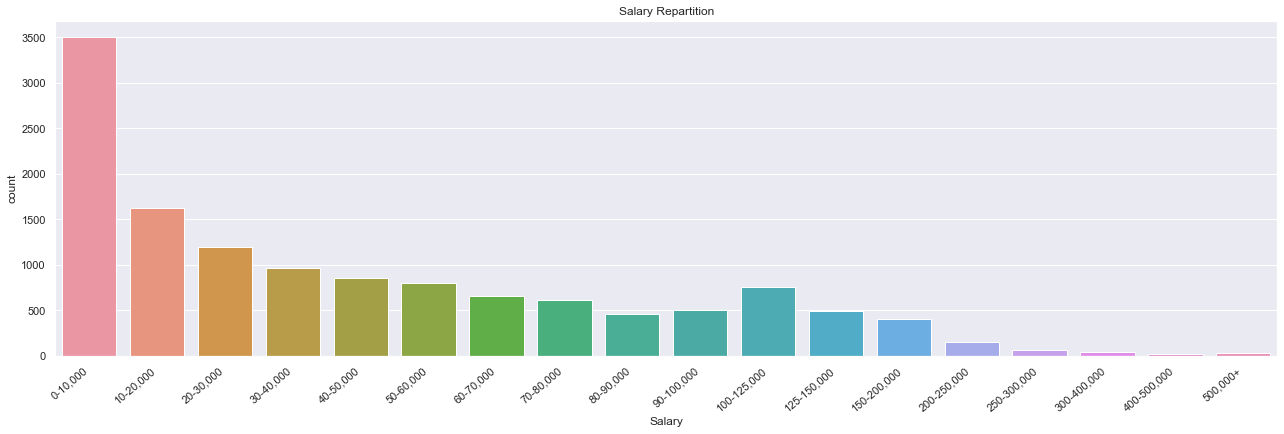

In [51]:
#Reorder the Salary Bracket
Salary_Order = ['0-10,000','10-20,000', '20-30,000', '30-40,000', '40-50,000','50-60,000', '60-70,000', '70-80,000', 
                '80-90,000', '90-100,000','100-125,000', '125-150,000', '150-200,000','200-250,000',
                '250-300,000', '300-400,000', '400-500,000', '500,000+' 
               ]

#Plot Distribution
countplot('Q9', df_EDA, Salary_Order,1)
plt.title("Salary Repartition")
plt.xlabel("Salary")
plt.show()

Based on the count plot,it seems like the salary bracket with largest count is between 0-10,000. This seems odd since data scientists are known to get paid way more. This is because the large group of the people that took the survey are still a student and obviously students mostly have no income.

We will plot the distribution again with students removed.

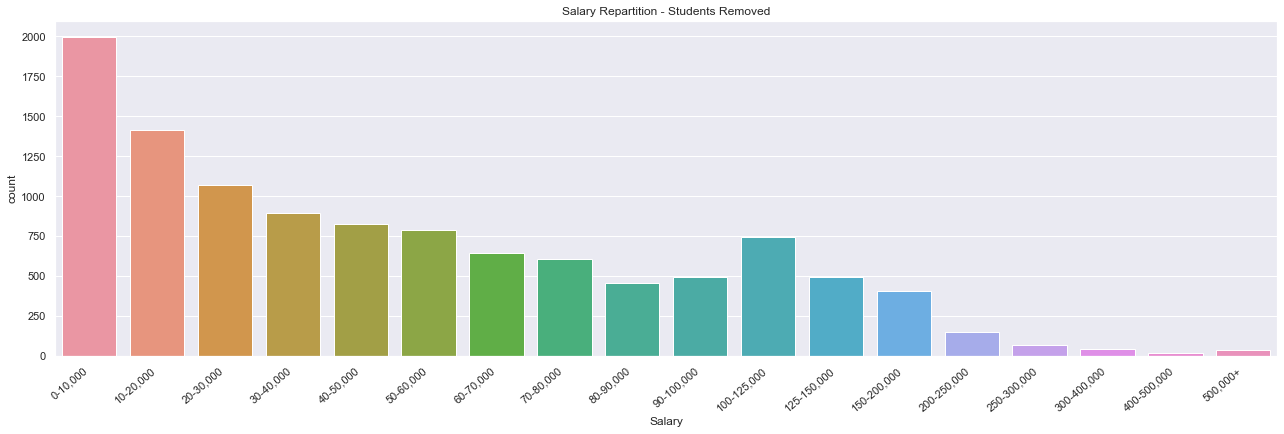

In [52]:
#Remove students and their salary
Students_index = df_EDA[df_EDA['Q6']=='Student'].index
df_EDA_students_removed = df_EDA.drop(Students_index, axis = 0)

#Plot Salary Distribution with Students Removed
countplot('Q9', df_EDA_students_removed, Salary_Order, 1)
plt.title("Salary Repartition - Students Removed")
plt.xlabel("Salary")
plt.show()

Even after removing the students, there are large subset of people earning generally a lower salary. This can be the representation of respondents from countries with lower salary. 

The peak around '100-125,000' corresponds to the large amount of data scientist in the countries with higher salary. In United States, earning over 6 figures is not surprising as a data scientist.

### 2.2 EDA of Features

In this section, we will be exploring all of the single response multiple choice questions and examine if there are any apparent trends visible when comparing between the salary.


### Q1: Gender 

Text(0.5, 1, 'Average Salary per Gender')

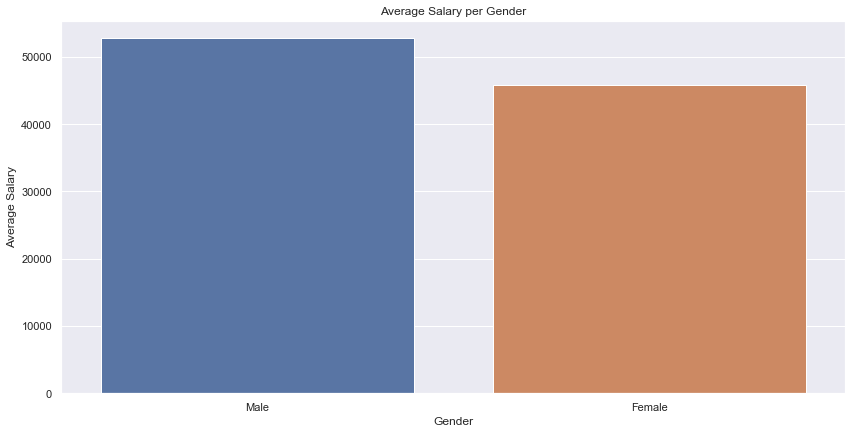

In [53]:
Gender_Order = df_EDA['Q1'].value_counts().index

#Get mean of the Salary for different gender
gender = df_EDA[['Numerical_Salaries','Q1']].groupby(['Q1']).mean()

#Plot Bar Graph
barplot(gender.index, 'Numerical_Salaries', gender, Gender_Order, 0)
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.title("Average Salary per Gender")

Text(0.5, 1, 'Distribution of Average Salary per Gender')

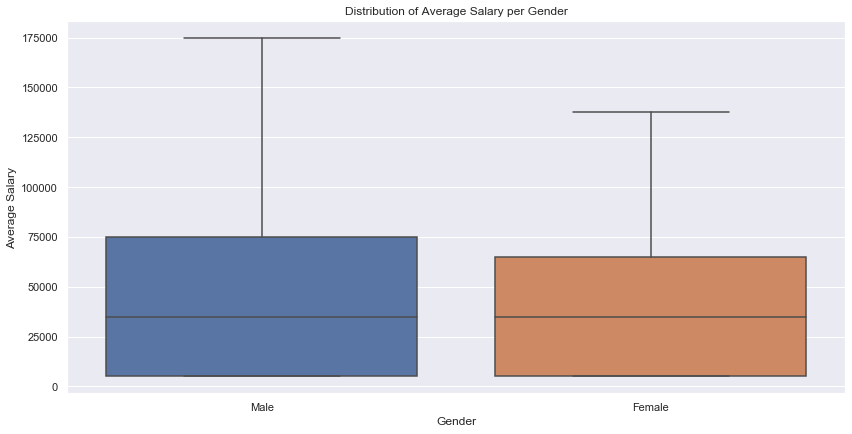

In [54]:
#Plot Boxplot
boxplot('Q1', 'Numerical_Salaries', df_EDA, Gender_Order, 0)
plt.xlabel("Gender")
plt.ylabel("Average Salary")
plt.title("Distribution of Average Salary per Gender")

In average, male tends to earn more money than female. Also, based on the bar distribution curve, there are more male are distributed towards higher salary as opposed to female. There is definitely a trend between gender and salary which could help us in our model.

### Q2: Age 

Text(0.5, 1, 'Average Salary per Age Group')

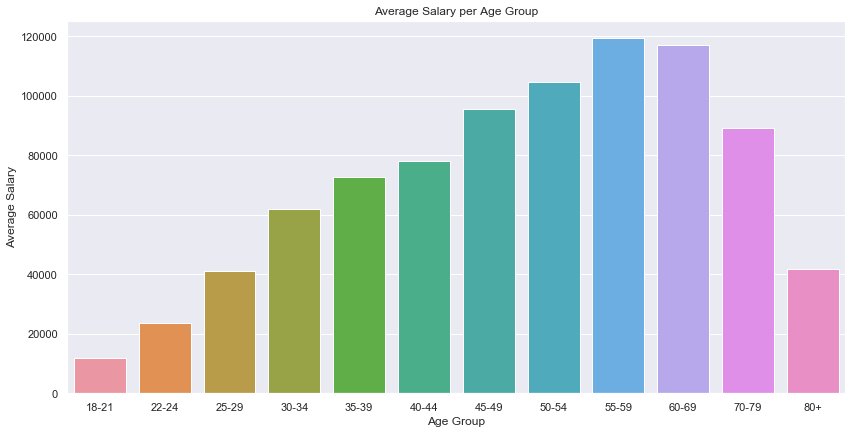

In [55]:
Age_Order = ['18-21', '22-24', '25-29', '30-34','35-39','40-44', '45-49','50-54','55-59','60-69','70-79','80+']

#Get mean of the Salary for different Age Group
age = df_EDA[['Numerical_Salaries','Q2']].groupby(['Q2']).mean()

#Plot Bar Graph
barplot(age.index, 'Numerical_Salaries', age, Age_Order, 0)
plt.xlabel("Age Group")
plt.ylabel("Average Salary")
plt.title("Average Salary per Age Group")

Text(0.5, 1, 'Distribution of Average Salary per Age Group')

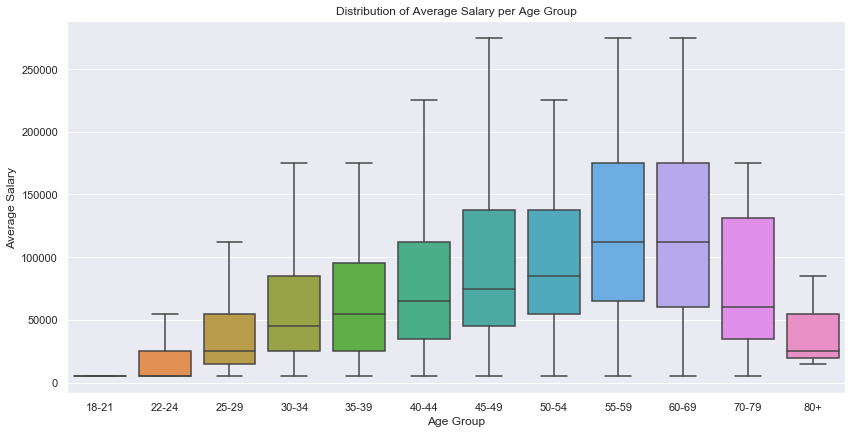

In [56]:
#Plot Boxplot
boxplot('Q2', 'Numerical_Salaries', df_EDA, Age_Order, 0)
plt.xlabel("Age Group")
plt.ylabel("Average Salary")
plt.title("Distribution of Average Salary per Age Group")

We see that the older you are, the higher the compensation. This makes sense, because older age group tends to have more experience which usually means higher salary. Based on both barplot and boxplot, age and salary seems to be highly correlated. 

### Q3: Country of Residence

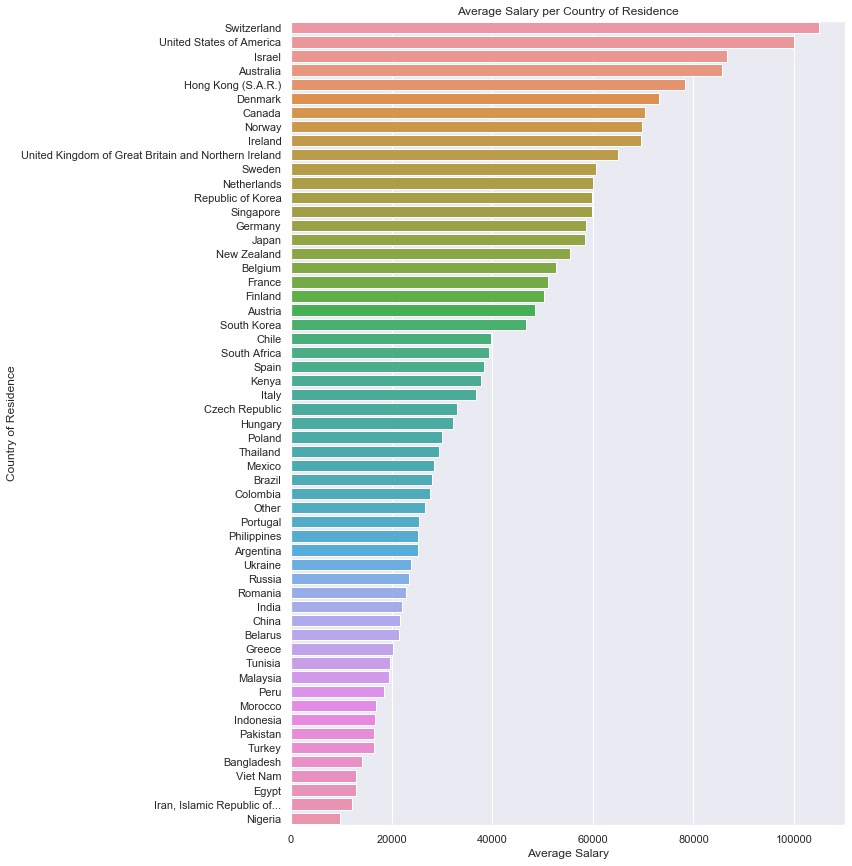

In [57]:
#Order category by descending order of Average Salary
country = df_EDA[['Numerical_Salaries','Q3']].groupby(['Q3']).mean()
Country_Order = country.sort_values('Numerical_Salaries', ascending = False).index

#Plot Average Salary for Country of Residence 
plt.figure(figsize=(12,12))
ax = sns.barplot(x='Numerical_Salaries', y = country.index, data=country, order = Country_Order, orient = 'h')
plt.tight_layout()
plt.title("Average Salary per Country of Residence")
plt.ylabel("Country of Residence")
plt.xlabel("Average Salary")
plt.show()

As expected, depending on the country of residence has large impact on the average compensation. The country with high cost of living tends to have higher salary standards. The country of residence show high correlation or trend between the salary.

### Q4: Education

Text(0.5, 1, 'Average Salary per Education Level')

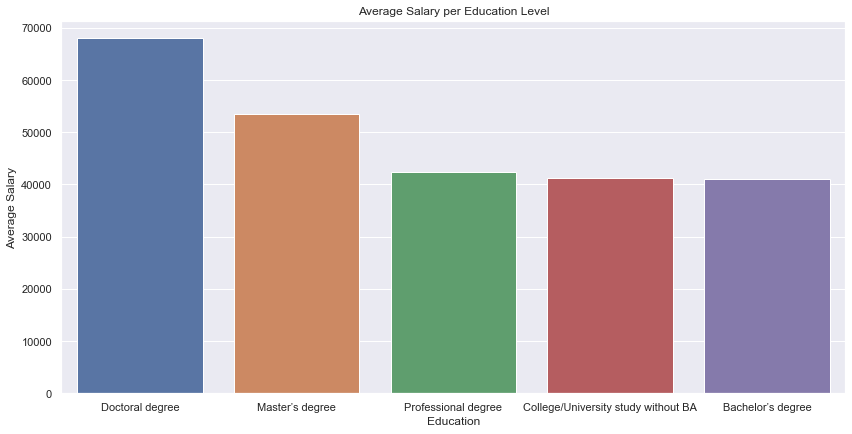

In [58]:
#Rename Feature Values
df_EDA['Q4'] = df_EDA['Q4'].str.replace('Some college/university study without earning a bachelor’s degree', 'College/University study without BA')

#Get mean of the Salary for different Education Group
education = df_EDA[['Numerical_Salaries','Q4']].groupby(['Q4']).mean()

#Order category by descending order of Average Salary
Education_Order = education.sort_values('Numerical_Salaries', ascending = False).index


#Plot Bar Graph
barplot(education.index, 'Numerical_Salaries', education, Education_Order, 0)
plt.xlabel("Education")
plt.ylabel("Average Salary")
plt.title("Average Salary per Education Level")

Text(0.5, 1, 'Average Salary per Education Level')

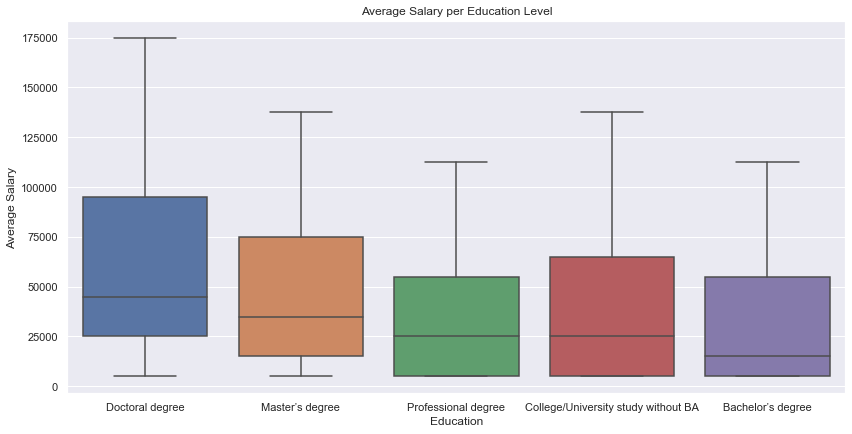

In [59]:
#Plot Boxplot
boxplot('Q4', 'Numerical_Salaries', df_EDA, Education_Order, 0)
plt.xlabel("Education")
plt.ylabel("Average Salary")
plt.title("Average Salary per Education Level")

Those with higher education, doctoral degree and master's degree do tend to earn more money compared to other education levels, but between professional degree, college/university study without BA and bachelor's degree have not much difference in salary. Based on the graph, it seems like salary and higher education level shows correlation, but not with the lower level of education.

### Q5: Undergraduate Major

Text(0.5, 1, 'Average Salary per Undergraduate Major')

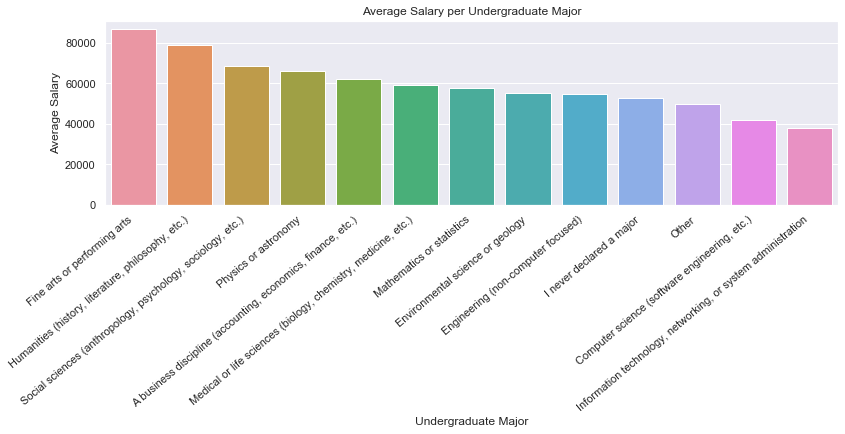

In [60]:
#Get mean of the Salary for different Education Group
major = df_EDA[['Numerical_Salaries','Q5']].groupby(['Q5']).mean()

#Get order by Descending Order
Major_Order = major.sort_values('Numerical_Salaries', ascending = False).index

#Plot Bar Graph
barplot(major.index, 'Numerical_Salaries', major, Major_Order, 1)
plt.xlabel("Undergraduate Major")
plt.ylabel("Average Salary")
plt.title("Average Salary per Undergraduate Major")

Text(0.5, 1, 'Average Salary per Undergraduate Major')

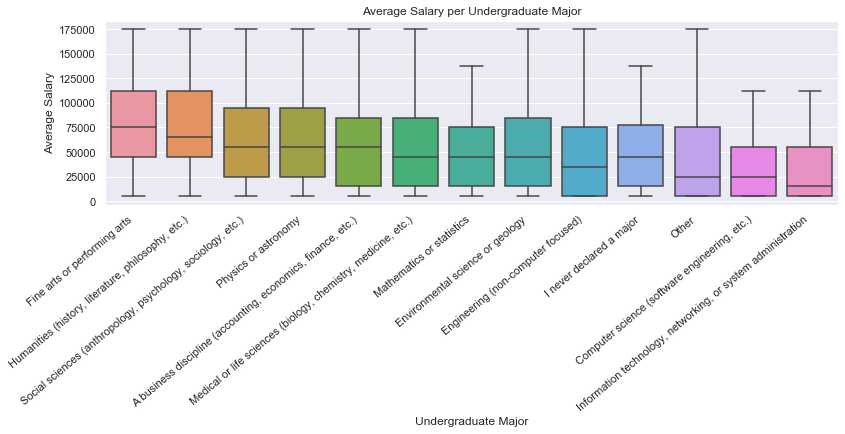

In [61]:
#Plot Boxplot
boxplot('Q5', 'Numerical_Salaries', df_EDA, Major_Order, 1)
plt.xlabel("Undergraduate Major")
plt.ylabel("Average Salary")
plt.title("Average Salary per Undergraduate Major")

Based on the barplot, the trend exists between the undergarduate major and the salary, but if we examine the boxplot, the salary distribution for almost all majors are wide amd skewed. Therefore, average salary may not be a good representation. Regardless, if you examine the interquartile range in the boxplot, the correlation between salary and the undergraduate major exists, but not a strong correlation.

### Q6: Job Title

Text(0.5, 1, 'Average Salary per Job Title')

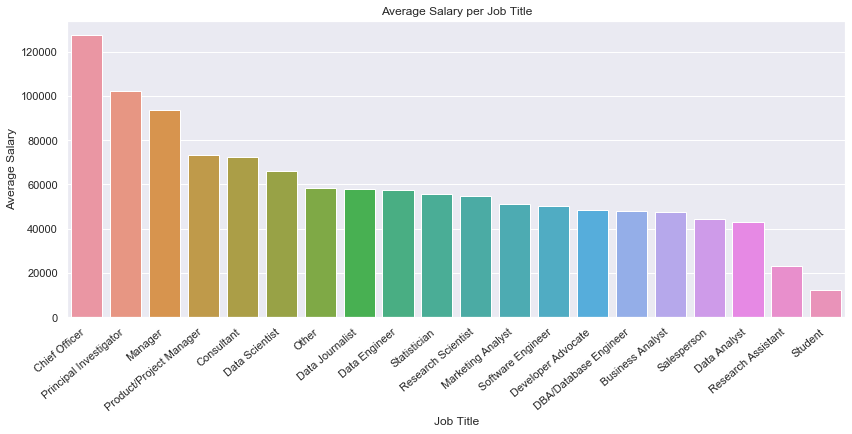

In [62]:
#Get mean of the Salary for different Education Group
title = df_EDA[['Numerical_Salaries','Q6']].groupby(['Q6']).mean()

#Get order by Descending Order
Title_Order = title.sort_values('Numerical_Salaries', ascending = False).index

#Plot Bar Graph
barplot(title.index, 'Numerical_Salaries', title, Title_Order, 1)
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Job Title")

Text(0.5, 1, 'Average Salary per Job Title')

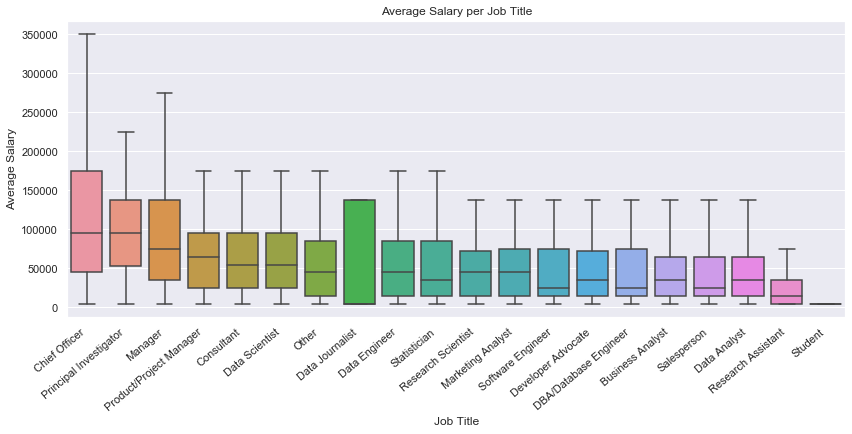

In [63]:
#Plot Boxplot
boxplot('Q6', 'Numerical_Salaries', df_EDA, Title_Order, 1)
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.title("Average Salary per Job Title")

It is apparent that managerial and c-level positions tend to earn the highest salary. Other positions tend to earn similar salary except for students where students earn less money. Strong salary correlation can be found only for managerial, c-level positions and students.

### Q7: Industry

Text(0.5, 1, 'Average Salary per Industry')

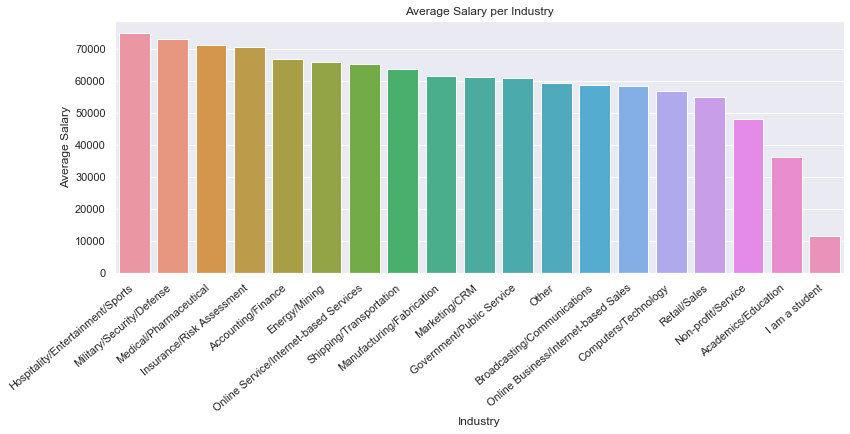

In [64]:
#Get mean of the Salary for different Education Group
industry = df_EDA[['Numerical_Salaries','Q7']].groupby(['Q7']).mean()

#Get order by Descending Order
Industry_Order = industry.sort_values('Numerical_Salaries', ascending = False).index

#Plot Bar Graph
barplot(industry.index, 'Numerical_Salaries', industry, Industry_Order, 1)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Average Salary per Industry")

Text(0.5, 1, 'Average Salary per Industry')

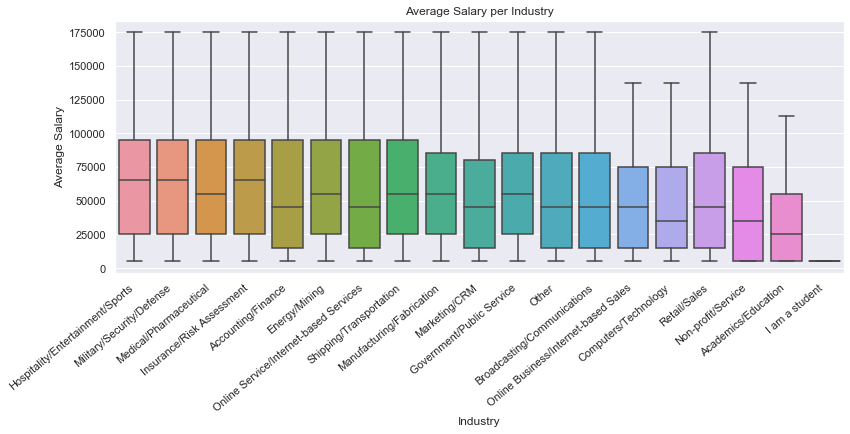

In [65]:
#Plot Boxplot
boxplot('Q7', 'Numerical_Salaries', df_EDA, Industry_Order, 1)
plt.xlabel("Industry")
plt.ylabel("Average Salary")
plt.title("Average Salary per Industry")

Despite the bar graph showing a trend in average salary, if you examine the boxplot, the distribution and the interquartile range is very similar throughout the industry. Based on the graph, unless you are a student, the industry and the salary does not have a strong relationship

### Q8: Years of Experience

Text(0.5, 1, 'Average Salary per Years of Experience')

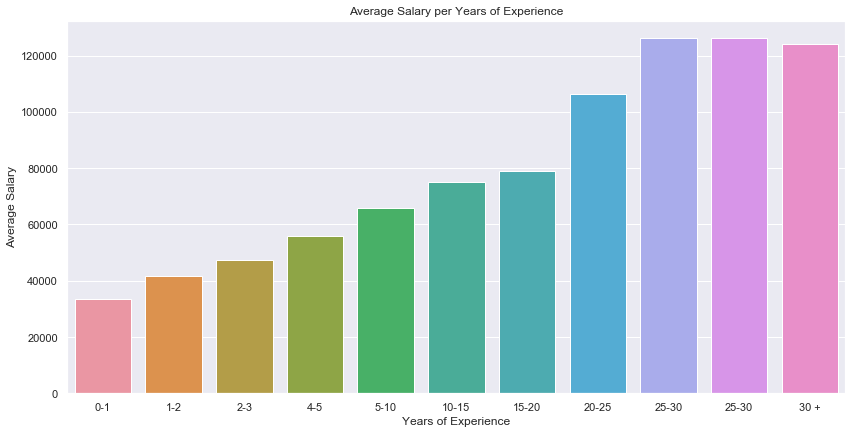

In [66]:
#Get mean of the Salary for different Age Group
experience = df_EDA[['Numerical_Salaries','Q8']].groupby(['Q8']).mean()

Experience_Order = ['0-1', '1-2', '2-3','4-5', '5-10', '10-15', '15-20', '20-25', '25-30', '25-30','30 +']

#Plot Bar Graph
barplot(experience.index, 'Numerical_Salaries', experience, Experience_Order, 0)
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Experience")

Text(0.5, 1, 'Average Salary per Years of Experience')

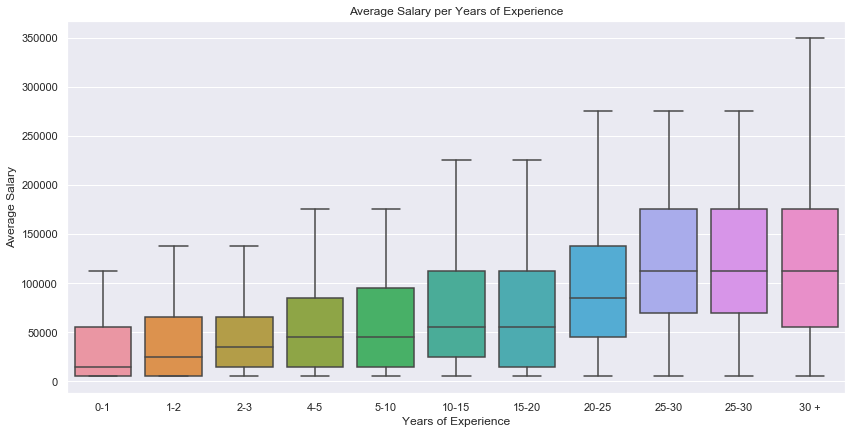

In [67]:
#Plot Boxplot
boxplot('Q8', 'Numerical_Salaries', df_EDA, Experience_Order,0)
plt.xlabel("Years of Experience")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Experience")

As expected, we see the trend of the more years of experience you have, the more you earn. This feature shows a strong trend which will help us with the model.

### Q12: Primary Tool for Analysis

Text(0.5, 1, 'Average Salary per Primary Analysis Tool')

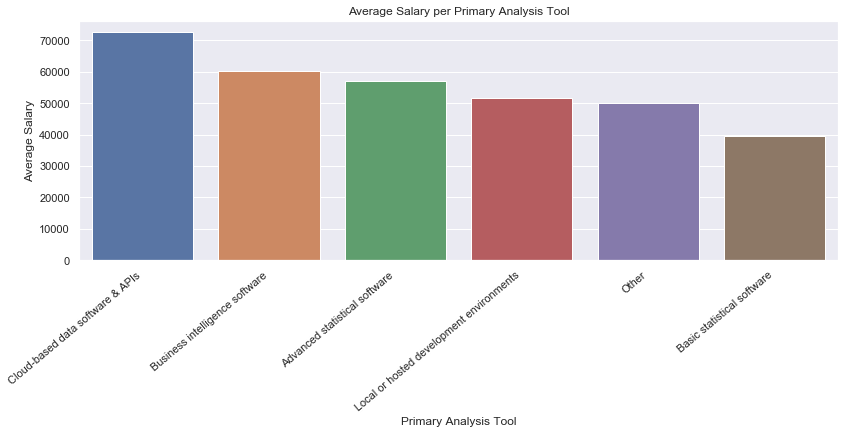

In [68]:
#Rename Feature Values
df_EDA['Q12'] = df_EDA['Q12'].str.replace('Basic statistical software \(Microsoft Excel, Google Sheets, etc.\)', 'Basic statistical software')
df_EDA['Q12'] = df_EDA['Q12'].str.replace('Local or hosted development environments \(RStudio, JupyterLab, etc.\)', 'Local or hosted development environments')
df_EDA['Q12'] = df_EDA['Q12'].str.replace('Advanced statistical software \(SPSS, SAS, etc.\)', 'Advanced statistical software')
df_EDA['Q12'] = df_EDA['Q12'].str.replace('Business intelligence software \(Salesforce, Tableau, Spotfire, etc.\)', 'Business intelligence software')
df_EDA['Q12'] = df_EDA['Q12'].str.replace('Cloud-based data software & APIs \(AWS, GCP, Azure, etc.\)', 'Cloud-based data software & APIs')

#Get mean of the Salary for different Education Group
tool = df_EDA[['Numerical_Salaries','Q12']].groupby(['Q12']).mean()

#Get order by Descending Order
Tool_Order = tool.sort_values('Numerical_Salaries', ascending = False).index

#Plot Bar Graph
barplot(tool.index, 'Numerical_Salaries', tool, Tool_Order, 1)
plt.xlabel("Primary Analysis Tool")
plt.ylabel("Average Salary")
plt.title("Average Salary per Primary Analysis Tool")

Text(0.5, 1, 'Average Salary per Primary Analysis Tool')

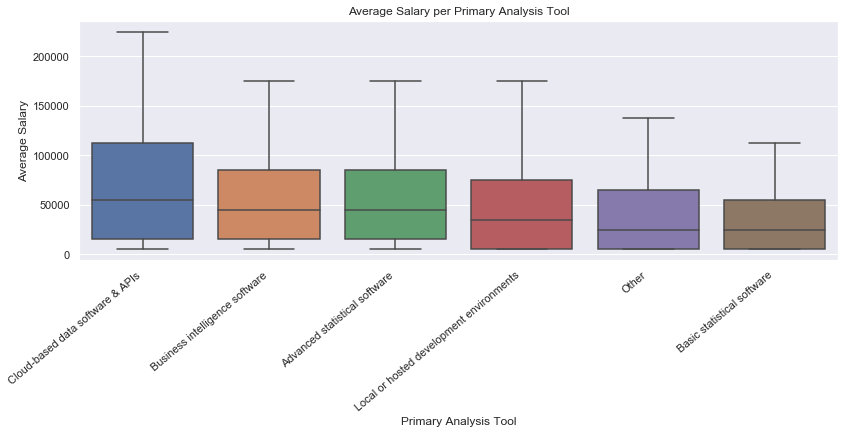

In [69]:
#Plot Boxplot
boxplot('Q12', 'Numerical_Salaries', df_EDA, Tool_Order,1)
plt.xlabel("Primary Analysis Tool")
plt.ylabel("Average Salary")
plt.title("Average Salary per Primary Analysis Tool")

Based on the graph, if you use the cloud-based data software & APIs, you tend to earn more money, but there aren't significant relationship with the salary for other softwares.

### Q17: Primary Programming Language

Text(0.5, 1, 'Average Salary per Years of Primary Programming Language')

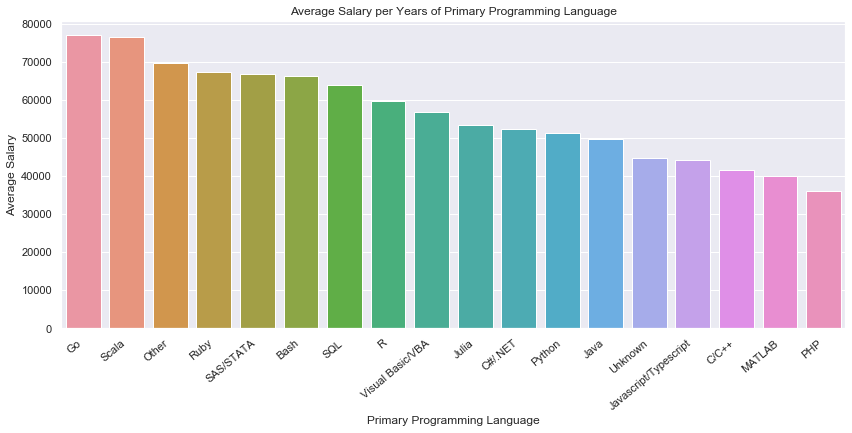

In [70]:
#Get mean of the Salary for different Age Group
language = df_EDA[['Numerical_Salaries','Q17']].groupby(['Q17']).mean()

Language_Order = language.sort_values('Numerical_Salaries', ascending = False).index

#Plot Bar Graph
barplot(language.index, 'Numerical_Salaries', language, Language_Order, 1)
plt.xlabel("Primary Programming Language")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Primary Programming Language")

Text(0.5, 1, 'Average Salary per Years of Primary Programming Language')

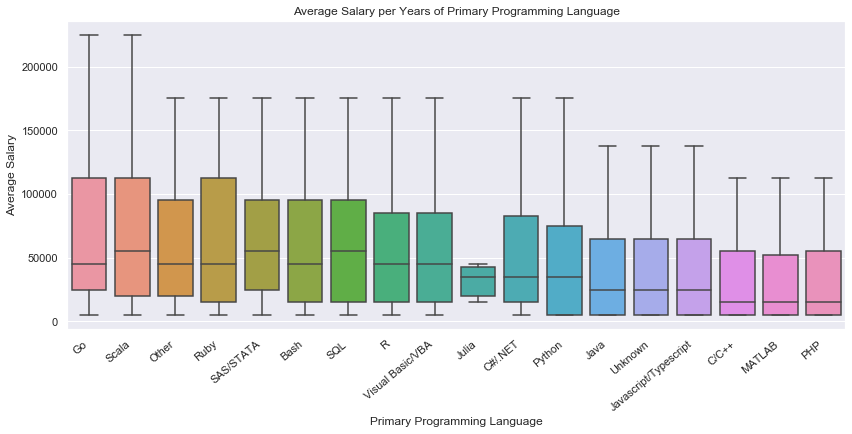

In [71]:
#Plot Boxplot
boxplot('Q17', 'Numerical_Salaries', df_EDA, Language_Order,1)
plt.xlabel("Primary Programming Language")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Primary Programming Language")

There are few coding language that have strong correlation or trend with the salary, but overall, it seems like this attribute doesn't have strong trend or relationship with the salary.

### Q24: Years of Coding Experience

Text(0.5, 1, 'Average Salary per Years of Coding Experience')

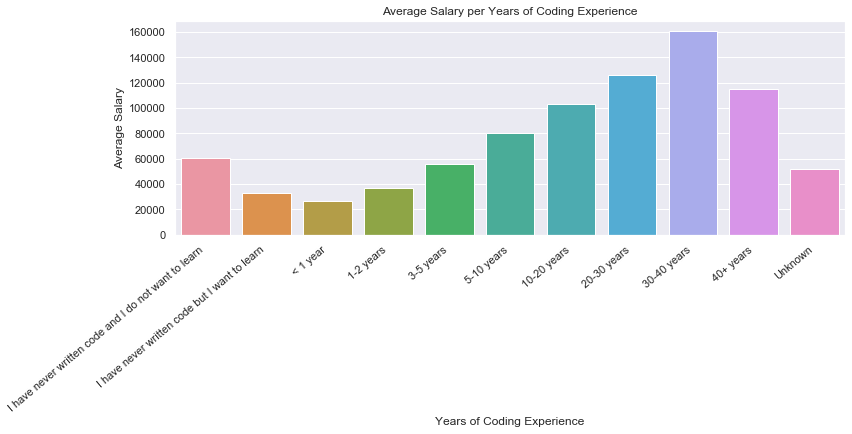

In [72]:
#Get mean of the Salary for different Age Group
coding_experience = df_EDA[['Numerical_Salaries','Q24']].groupby(['Q24']).mean()

Coding_Experience_Order = ['I have never written code and I do not want to learn', 
                           'I have never written code but I want to learn', '< 1 year', 
                           '1-2 years', '3-5 years', '5-10 years','10-20 years', '20-30 years',
                           '30-40 years', '40+ years', 'Unknown']

#Plot Bar Graph
barplot(coding_experience.index, 'Numerical_Salaries', coding_experience, Coding_Experience_Order, 1)
plt.xlabel("Years of Coding Experience")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Coding Experience")

Text(0.5, 1, 'Average Salary per Years of Coding Experience')

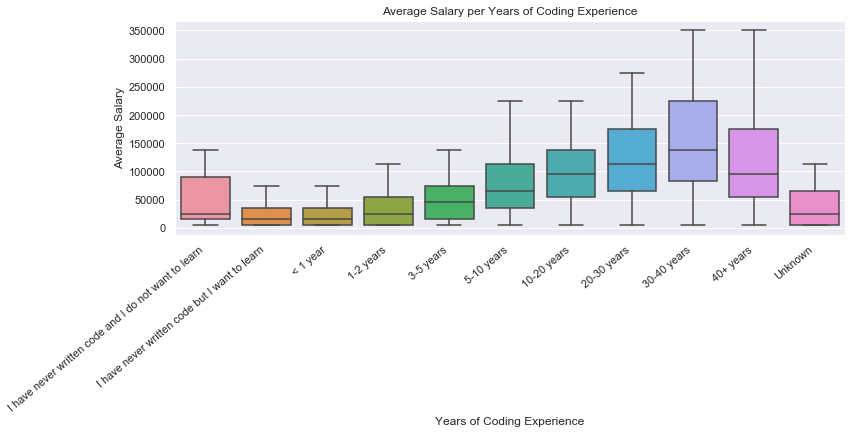

In [73]:
#Plot Boxplot
boxplot('Q24', 'Numerical_Salaries', df_EDA, Coding_Experience_Order,1)
plt.xlabel("Years of Coding Experience")
plt.ylabel("Average Salary")
plt.title("Average Salary per Years of Coding Experience")

As expected, the more years of coding experience you have, the more you earn.

### Feature Importance

A quick way to look into feature importance is by analyzing the correlation between the features and the target. For our case, since we have decided to use one-hot encoding for changing the categorical data to numerical, we are treating each category as a feature. Therefore, we will be looking into the correlation of each category in the feature and determine which features have high number of categories with strong correlation.

For simplicity of the computation, we will treat target variable, salary as a numerical variable by using the average of the salary bracket. 

It is worth mentioning that correlation or Pearson Coefficient is built for continuous data.Thus, when applied to categorical data, we obtain measure of relationship that may be not precise. Therefore, we shouldn't make a conclusion from the correlation graph, but it is still useful to get a general idea on which features are important for predicting the target.

Text(0.5, 1, 'Correlation per feature')

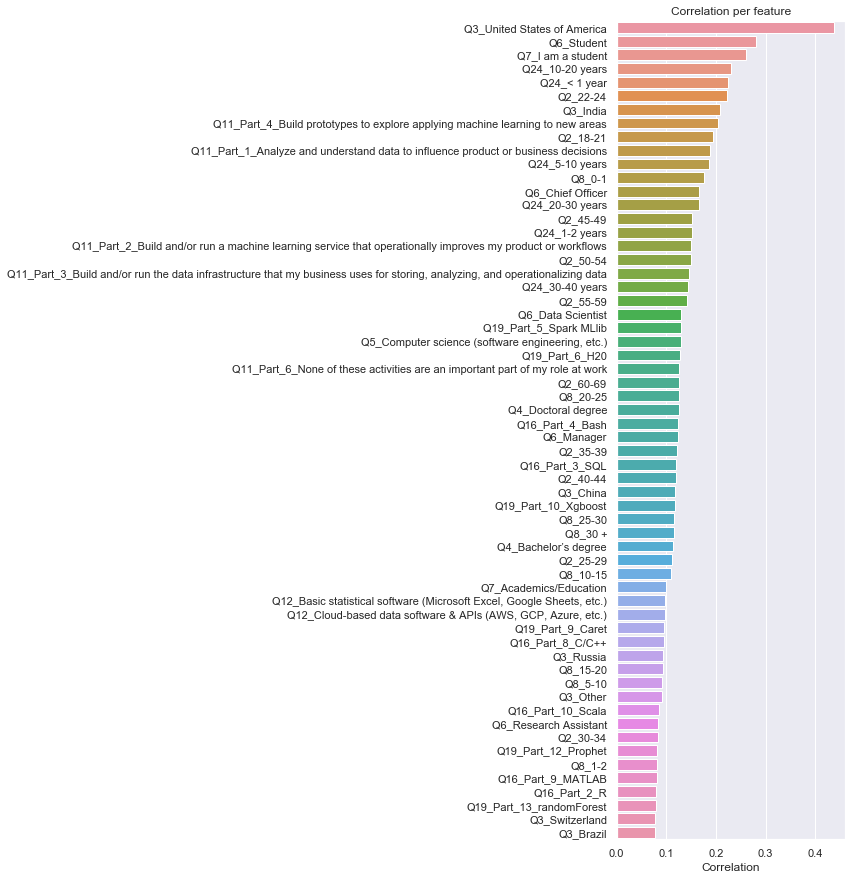

In [74]:
#Create a df with dummy features and add target salary in numerical value
corr_df = features_dummies.copy()
corr_df['Target'] = df_EDA['Numerical_Salaries']

#Get correlation between all features and target
corr = corr_df.drop("Target", axis=1).apply(lambda x: x.corr(corr_df.Target))

#Get 60 features with highest absolute correlation
top60_corr = abs(corr).sort_values(ascending = False).iloc[:60]

#Plot
plt.figure(figsize=(12,12))
ax = sns.barplot(x =top60_corr, y = top60_corr.index, orient = 'h')
plt.tight_layout()
plt.xlabel('Correlation')
plt.title('Correlation per feature')

**Given the data, which of the original attributes in the data are most related to a survey respondent’s yearly compensation?**

For our dataset, we one-hot encoded which results in the graph above showing the correlation of each category, not the original attribute. We will still extract ones with high correlation through examining the correlation of each category.

Based on the graph, the attributes with high correlation are as follows:
* Q3: Country of Residence
* Q24: Years of coding experience
* Q2: Age group
* Q11: Activities or most important role at work

It is worth mentioning that students tend to have high correlation betwween the salary due to the fact that most of the students earn within the salary bracket of 0-10,000. 

Please note that high correlation of a feature doesn't necessarily result in higher salary. It means that the relationship between the feature and the salary is strong. 

## 3.0 Feature Engineering & Selection (10 Marks)

**Question - Explain how feature engineering is a useful tool in machine learning**

Feature engineering is useful and important tool in machine learning since features in our data will directly influence the models you use and results you achieve. Feature engineering divides into three major categories, which are feature transformation, feature extraction and feature selection.

Feature selection is about selecting a small subset of features from a large pool of features. We select those attributes that explain the relationship of attributes with the target variable. This is important as it reduces the computation time and resources needed to create models as well as preventing overfitting. 

Common methods for feature transformation includes scaling, normalizing, taking the log, binning and filling missing values. There are many applications for feature transformation, but they are ultimately for presenting the data in a way for the better predictive model.

Finally, in a a data with large variables, the modeling requires a lot of computation power and memory. Therefore, we use feature extraction to reduce the dimensionality of these type of variables and obtain more efficient processing power. 

For our dataset, we will be using Lasso Regularization for feature selection and use PCA for feature extraction to reduce the dimensionality of the features. As for feature transformation, we do not need to normalize our data as all our features are in the same scale (1 or 0). 

In [75]:
features_dummies.shape

(13130, 218)

Due to one hot encoding, our starting number of features are currently 217 variables.

### 3.1 Lasso Regularization

First of all, there are many different methods for feature selection, but we chose Lasso regularization for our feature selection as these methods or techniques are optimized for prediction rather than inference. In short, using Lasso will allows us to achieve ideal model and eliminate overfitting. Also, since we have large number of features, there's a strong possibility that it will introduce multicollinearity which isn't ideal in predictive modeling. Using Lasso regularization or L1 catches and penalizes the coefficient to zero for those features that aren't statisticall significant and have multicollinearity. 

One downside is that Lasso regularization is sensitive to the hyperparameter and requires tuning. The coefficient alpha changes the amount of variance and bias in the result. Therefore, we ideally need to optimize and tune for the best value.

Sklearn has a module called LassoLarsCV where it finds the best alpha and applies the Lasso regularization based on the cross validation score. We will utilize this module to perform the lasso regularization and determine which features to select.

In [76]:
numerical_target = df_EDA['Numerical_Salaries']

from sklearn.linear_model import LassoLarsCV

#The best alpha parameter is selected by cross-validation
model = LassoLarsCV(cv=10, precompute=False).fit(features_dummies, numerical_target)

coef = pd.Series(model.coef_, index = features_dummies.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

selected_features = features_dummies[coef[coef!=0].index]

Lasso picked 183 variables and eliminated the other 35 variables


In [77]:
coef[coef==0]

Q1_Male                                                                     0.0
Q2_30-34                                                                    0.0
Q3_Bangladesh                                                               0.0
Q3_Chile                                                                    0.0
Q3_Philippines                                                              0.0
Q3_Tunisia                                                                  0.0
Q4_Master’s degree                                                          0.0
Q5_Computer science (software engineering, etc.)                            0.0
Q5_Humanities (history, literature, philosophy, etc.)                       0.0
Q5_Physics or astronomy                                                     0.0
Q5_Social sciences (anthropology, psychology, sociology, etc.)              0.0
Q6_Data Journalist                                                          0.0
Q6_Developer Advocate                   

When we one hot encode, we actually need to drop one column from each feature as it introduces multicollinearity. Since we ran Lasso, we do not need to since Lasso identified this factor and actually dropped at least one column from each feature.

### 3.2 Dimensionality Reduction Through PCA

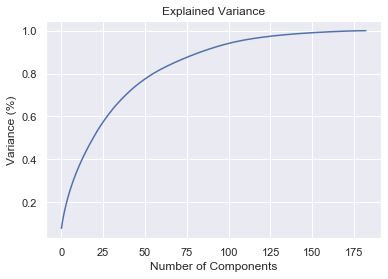

In [78]:
pca = PCA().fit(selected_features)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

The graph above indicates the percentage of variance you maintain depending on the number of components you choose. The lower the principal components, the less variance you are going to maintain. For our case, since we want to maintain all our variance and preserve the feature meanings, we are not going to use PCA for dimensionality reduction.

## 4.0 Model Implementation

In our model implementation, we will implement logistic regression algorithm using 10-fold cross-validation. During the lecture, our professor explained an algorithm for capturing the ordinal aspect of our target variable when running the logistic regression. We will use so-called the ordinal logistic regression to create a predictive model.

Then, we will look into one hyperparameter and how varying parameter affects the bias and variance trade-off.

### 4.1 Ordinal Logistic Regression Implementation

The algorithem professor showed us during lecture allow us to tackel ordinal regression through running multiple binary classification. The probability of each salary bracket is computed as follows:

1. Pr(0-40,000) = 1 - Pr(>40,000)
2. Pr(40-80,000) = Pr(>40,000) - Pr(>80,000)
3. Pr(80-150,000) = Pr(>80,000) - Pr(>150,000)
4. Pr(150-300,000) = Pr(>150,000) - Pr(>300,000)
5. Pr(300,000+) = Pr(>300,000)

In order to achieve this, we firstly need to encode our target variable to classify (>40,000), (>80,000), (>150,000), and (>300,000).

We will run 4 binary logistic regression and apply the algorithm to get the probability of each salary bracket. Then, we will simply classify to the salary bracket with highest probability 

In [79]:
#Split the minumum and maximum range to a list
Target_Salaries = target.str.replace(',', '').str.replace('300000\+','300-300000').str.split('-')
Target_Avg_Salaries = Target_Salaries.apply(lambda x: (int(x[0]) * 1000 + int(x[1]))/2)

In [80]:
target_encoded = target.copy().to_frame()

#40,000
index_40000 = Target_Avg_Salaries[Target_Avg_Salaries > 40000].index
target_encoded['>40,000'] = 0
target_encoded.iloc[index_40000, target_encoded.columns.get_loc('>40,000')] = 1

#80,000
index_80000 = Target_Avg_Salaries[Target_Avg_Salaries > 80000].index
target_encoded['>80,000'] = 0
target_encoded.iloc[index_80000, target_encoded.columns.get_loc('>80,000')] = 1

#150,000
index_150000 = Target_Avg_Salaries[Target_Avg_Salaries > 150000].index
target_encoded['>150,000'] = 0
target_encoded.iloc[index_150000, target_encoded.columns.get_loc('>150,000')] = 1

#300,000
index_300000 = Target_Avg_Salaries[Target_Avg_Salaries == 300000].index
target_encoded['>300,000'] = 0
target_encoded.iloc[index_300000, target_encoded.columns.get_loc('>300,000')] = 1

In [81]:
target_encoded.loc[:20]

,Q9,">40,000",">80,000",">150,000",">300,000"
0,"0-40,000",0,0,0,0
1,"0-40,000",0,0,0,0
2,"0-40,000",0,0,0,0
3,"0-40,000",0,0,0,0
4,"0-40,000",0,0,0,0
5,"0-40,000",0,0,0,0
6,"80-150,000",1,1,0,0
7,"0-40,000",0,0,0,0
8,"0-40,000",0,0,0,0
9,"0-40,000",0,0,0,0


### Logistic Regression Implementation

For now, we will choose a C value and solver as 0.01 and 'liblinear' respectively and see how the accuracy is like. For the following section, we will take a deeper look into the parameter C.

Note that we do not require any form of scaling or normalization as the scale for all features are the same (1 or 0)

In [82]:
X = selected_features
y = target_encoded

Salary_Bracket = ['0-40,000','40-80,000','80-150,000','150-300,000','300,000+']

model = LogisticRegression(C = 0.01, solver = 'liblinear')
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)
accuracy = np.zeros(10)
test_log_loss_fold = np.zeros(10)

np_idx = 0

#10 Fold Cross Validation
for train_idx, test_idx in kfold.split(X):

    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    salary_prob_test = pd.DataFrame([], index = X_test.index) #Stores the probability for test data
    
    #Probaility for Salary > 40,000
    model.fit(X_train, y_train['>40,000'])    
    #Test data probability
    salary_prob_test['>40,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['0-40,000'] = 1 - salary_prob_test['>40,000']

    #Model for Salary > 80,000 & 40-80,000
    model.fit(X_train, y_train['>80,000'])
    #Test data probability
    salary_prob_test['>80,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['40-80,000'] = salary_prob_test['>40,000'] - salary_prob_test['>80,000']
    
    #Model for Salary > 150,000 & 80-150,000
    model.fit(X_train, y_train['>150,000'])
    #Test data probability
    salary_prob_test['>150,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['80-150,000'] = salary_prob_test['>80,000'] - salary_prob_test['>150,000']

    #Model for Salary > 300,000
    model.fit(X_train, y_train['>300,000'])
    #Test data probability
    salary_prob_test['>300,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['150-300,000'] = salary_prob_test['>150,000'] - salary_prob_test['>300,000']
    salary_prob_test['300,000+'] = salary_prob_test['>300,000']

    #Picks the class with highest probability for  test data
    predictions_test = pd.Series(salary_prob_test[Salary_Bracket].idxmax(axis=1), index = X_test.index)
    
    #Compute the Accuracy
    ACC=accuracy_score(predictions_test,y_test['Q9'])*100
    accuracy[np_idx] = ACC
    np_idx += 1
            
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 79.817%
Fold 2: Accuracy: 67.555%
Fold 3: Accuracy: 61.691%
Fold 4: Accuracy: 69.612%
Fold 5: Accuracy: 76.009%
Fold 6: Accuracy: 67.098%
Fold 7: Accuracy: 66.794%
Fold 8: Accuracy: 68.85%
Fold 9: Accuracy: 70.221%
Fold 10: Accuracy: 73.267%
Average Score: 70.091%(4.882%)


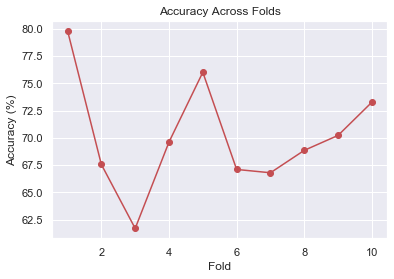

In [83]:
plt.plot(range(1,11),accuracy,'o-', color="r")
plt.title("Accuracy Across Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.show()

**Questions - How does your model accuracy compare across the folds? What is average and variance of accuracy for folds?**

In the figure above, the accuracy do vary fold to fold. The difference between the highest and the lowest is around 18% which is quite high. This indicates that the test accuracy for each fold depends on which subset of the data are allocated to the test set.

Based on the result, the average and variance of accuracy for folds are computed as 70.091% and 5.0% respectively.For multiclassification with 5 classes, the average accuracy and standard deviation isn't too bad, but more improvements can be made.  

### 4.2 Bias & Variance for Parameter C

For this section, we will look into the log loss for different parameter C and determine which model performed the best based in terms of bias and variance tradeoff.

We use log loss, because it is the cost function of logistic regression whereas for linear regression, MSE is used as the cost function. Hence, examining the log loss is more representative of our application than MSE.

In [84]:
X = selected_features
y = target_encoded

Salary_Bracket = ['0-40,000','40-80,000','80-150,000','150-300,000','300,000+']

train_log_loss = []
test_log_loss = []

kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

C_list = [0.001,0.01,0.05,0.1,0.5,1,5,10, 100, 1000]

for C in C_list:
    
    model = LogisticRegression(C=C, solver = 'liblinear')
    accuracy = np.zeros(10)
    train_log_loss_cv = np.zeros(10)
    test_log_loss_cv = np.zeros(10)
    np_idx = 0
    
    for train_idx, test_idx in kfold.split(X):

        X_train, X_test = X.loc[train_idx], X.loc[test_idx]
        y_train, y_test = y.loc[train_idx], y.loc[test_idx]
        salary_prob_test = pd.DataFrame([], index = X_test.index) #Stores the probability for test data
        salary_prob_train = pd.DataFrame([], index = X_train.index) #Stores the probability for the train data

        #Probaility for Salary > 40,000
        model.fit(X_train, y_train['>40,000'])    
        #Test data probability
        salary_prob_test['>40,000'] = model.predict_proba(X_test)[:,1]
        salary_prob_test['0-40,000'] = 1 - salary_prob_test['>40,000']
        #Train data probability
        salary_prob_train['>40,000'] = model.predict_proba(X_train)[:,1]
        salary_prob_train['0-40,000'] = 1 - salary_prob_train['>40,000']

        #Model for Salary > 80,000 & 40-80,000
        model.fit(X_train, y_train['>80,000'])
        #Test data probability
        salary_prob_test['>80,000'] = model.predict_proba(X_test)[:,1]
        salary_prob_test['40-80,000'] = salary_prob_test['>40,000'] - salary_prob_test['>80,000']
        #Train data probability
        salary_prob_train['>80,000'] = model.predict_proba(X_train)[:,1]
        salary_prob_train['40-80,000'] = salary_prob_train['>40,000'] - salary_prob_train['>80,000']   


        #Model for Salary > 150,000 & 80-150,000
        model.fit(X_train, y_train['>150,000'])
        #Test data probability
        salary_prob_test['>150,000'] = model.predict_proba(X_test)[:,1]
        salary_prob_test['80-150,000'] = salary_prob_test['>80,000'] - salary_prob_test['>150,000']
        #Train data probability
        salary_prob_train['>150,000'] = model.predict_proba(X_train)[:,1]
        salary_prob_train['80-150,000'] = salary_prob_train['>80,000'] - salary_prob_train['>150,000']


        #Model for Salary > 300,000
        model.fit(X_train, y_train['>300,000'])
        #Test data probability
        salary_prob_test['>300,000'] = model.predict_proba(X_test)[:,1]
        salary_prob_test['150-300,000'] = salary_prob_test['>150,000'] - salary_prob_test['>300,000']
        salary_prob_test['300,000+'] = salary_prob_test['>300,000']
        #Train data probability
        salary_prob_train['>300,000'] = model.predict_proba(X_train)[:,1]
        salary_prob_train['150-300,000'] = salary_prob_train['>150,000'] - salary_prob_train['>300,000']
        salary_prob_train['300,000+'] = salary_prob_train['>300,000']

        #Picks the class with highest probability for both train and test data
        predictions_test = pd.Series(salary_prob_test[Salary_Bracket].idxmax(axis=1), index = X_test.index)
        predictions_train = pd.Series(salary_prob_train[Salary_Bracket].idxmax(axis=1), index = X_train.index)

        #One hot encode the target variable y(Log loss requires the target variable to be one hot encoded)
        encoded_y_test = pd.get_dummies(y_test['Q9'])
        encoded_y_train = pd.get_dummies(y_train['Q9'])
    
        #Compute log loss for each fold(Log loss uses one hot encoded target variable and probability of each salary bracket)
        #refer to https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
        test_log_loss_cv[np_idx] = log_loss(encoded_y_test[Salary_Bracket],salary_prob_test[Salary_Bracket])
        train_log_loss_cv[np_idx] = log_loss(encoded_y_train[Salary_Bracket],salary_prob_train[Salary_Bracket])
    
        #Compute accuracy for each fold
        ACC=accuracy_score(predictions_test,y_test['Q9'])*100
        accuracy[np_idx] = ACC
        np_idx += 1

        
    test_log_loss.append(np.mean(test_log_loss_cv))
    train_log_loss.append(np.mean(train_log_loss_cv))

    print ("Average Score with C = {}: {}%({}%)".format(C,round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Average Score with C = 0.001: 59.284%(8.88%)
Average Score with C = 0.01: 70.091%(4.882%)
Average Score with C = 0.05: 73.404%(4.084%)
Average Score with C = 0.1: 74.006%(3.881%)
Average Score with C = 0.5: 74.554%(3.88%)
Average Score with C = 1: 74.425%(3.956%)
Average Score with C = 5: 74.402%(3.943%)
Average Score with C = 10: 74.379%(3.988%)
Average Score with C = 100: 74.303%(4.006%)
Average Score with C = 1000: 74.265%(4.022%)


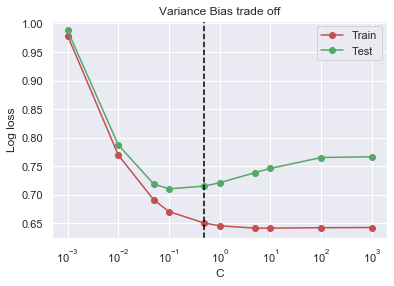

In [85]:
plt.plot(C_list, train_log_loss, 'o-', color="r",label="Train")
plt.plot(C_list, test_log_loss, 'o-', color="g", label="Test")
plt.semilogx()
plt.legend(loc="best")
plt.title("Variance Bias trade off")
plt.axvline(x=0.5,linestyle="--", color='black')
plt.xlabel("C")
plt.ylabel("Log loss")
plt.show()

**Question - Treating each value of hyperparameter(s) as a new model, which model performed best? Give the reason based on bias-variance trade-off**

As the parameter C decreases, the complexity of model decreases resulting in high bias and low variance. C value from 0.001 to 0.1 shows high bias and low variance since it shows high training error, and the validation error or test error is similar to train error. This is the general representation of underfitting as well. 

As the parameter C increases, the complexity of model increases resulting in low bias and high variance.C value from 1 to 1000 shows low bias and high variance since it shows very low training error, and high validation error. This is the general representation of overfitting as well. 

The optimal C would be anywhere between 0.1 to 1 as it has the optimal balance between bias and variance. 

It is worth mentioning that log loss takes account into the uncertainty of the prediction on how much it varies from the actual label as it looks at the probability of each label. Accuracy simply is the count of predictions where your predicted value equals the actual value. Therefore, the C value with minimum log loss doesn't always represent the highest accuracy. 

Despite the minimum log loss at C = 0.1, we will say that the best performing model is when C = 0.5 as it had the highest accuracy of 74.554%.

## 5.0 Model Tuning

Grid searching is a well known method for selecting hyperparameters that optimize your model.

Grid search just builds several models with all the parameter combinations specified, and runs cross validation to return the set of parameters that had the highest cv score on the validation set.

In our model, there are two hyperparameters in the logistic regression, which are the C value and the solver. We looked in the optimal C value in the previous section with bias and variance tradeoff reasoning, but for grid search, we will simply include the parameter again to see where it converges to.

For our metric, we will use accuracy as our performance metric for model tuning. There are different metrics we can use such as F1 score, precision and recall, but since we want to know if my model correctly identified cases.

In [86]:
X = selected_features
y = target_encoded

model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):

            X_train, X_test = X.loc[train_idx], X.loc[test_idx]
            y_train, y_test = y.loc[train_idx], y.loc[test_idx]
            salary_prob_test = pd.DataFrame([], index = X_test.index) #Stores the probability for test data

            #Probaility for Salary > 40,000
            model.fit(X_train, y_train['>40,000'])    
            #Test data probability
            salary_prob_test['>40,000'] = model.predict_proba(X_test)[:,1]
            salary_prob_test['0-40,000'] = 1 - salary_prob_test['>40,000']

            #Model for Salary > 80,000 & 40-80,000
            model.fit(X_train, y_train['>80,000'])
            #Test data probability
            salary_prob_test['>80,000'] = model.predict_proba(X_test)[:,1]
            salary_prob_test['40-80,000'] = salary_prob_test['>40,000'] - salary_prob_test['>80,000']

            #Model for Salary > 150,000 & 80-150,000
            model.fit(X_train, y_train['>150,000'])
            #Test data probability
            salary_prob_test['>150,000'] = model.predict_proba(X_test)[:,1]
            salary_prob_test['80-150,000'] = salary_prob_test['>80,000'] - salary_prob_test['>150,000']

            #Model for Salary > 300,000
            model.fit(X_train, y_train['>300,000'])
            #Test data probability
            salary_prob_test['>300,000'] = model.predict_proba(X_test)[:,1]
            salary_prob_test['150-300,000'] = salary_prob_test['>150,000'] - salary_prob_test['>300,000']
            salary_prob_test['300,000+'] = salary_prob_test['>300,000']

            #Picks the class with highest probability for  test data
            predictions_test = pd.Series(salary_prob_test[Salary_Bracket].idxmax(axis=1), index = X_test.index)

            #Compute the Accuracy
            ACC=accuracy_score(predictions_test,y_test['Q9'])*100
            accuracy[np_idx] = ACC
            np_idx += 1
            
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)
            
print (best_params)
print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'liblinear'}
Best Score: 74.554%(3.88%)

The optimal log model uses C=0.5, and a liblinear solver, and has a cross validation score of 74.554% with a standard deviation of 3.88%


Based on the grid search, we are able to achieve the highest accuracy of 74.554% with C = 0.5 and a liblinear solver. This is essentially the same parameter we were able to extract from our bias and variance studies for parameter C. We luckily used the liblinear solver for the previous implementation.

Overall, in logistic regression with 5 classes, achieving 74.554% is good considering the features, bias and complexity our data has.

## 6.0 Testing & Discussion

Using the parameters we found from the grid search, we will run our final logistic regression. Then, look into how it performs between training and validation across the folds and examine the overall fit of the model.

In [87]:
X = selected_features
y = target_encoded

Salary_Bracket = ['0-40,000','40-80,000','80-150,000','150-300,000','300,000+']


kfold = KFold(n_splits=10)
kfold.get_n_splits(X)    
model = LogisticRegression(C=0.5, solver = 'liblinear')
accuracy_test = np.zeros(10)
accuracy_train = np.zeros(10)
np_idx = 0
    
for train_idx, test_idx in kfold.split(X):

    X_train, X_test = X.loc[train_idx], X.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    salary_prob_test = pd.DataFrame([], index = X_test.index) #Stores the probability for test data
    salary_prob_train = pd.DataFrame([], index = X_train.index) #Stores the probability for the train data

    #Probaility for Salary > 40,000
    model.fit(X_train, y_train['>40,000'])    
    #Test data probability
    salary_prob_test['>40,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['0-40,000'] = 1 - salary_prob_test['>40,000']
    #Train data probability
    salary_prob_train['>40,000'] = model.predict_proba(X_train)[:,1]
    salary_prob_train['0-40,000'] = 1 - salary_prob_train['>40,000']

    #Model for Salary > 80,000 & 40-80,000
    model.fit(X_train, y_train['>80,000'])
    #Test data probability
    salary_prob_test['>80,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['40-80,000'] = salary_prob_test['>40,000'] - salary_prob_test['>80,000']
    #Train data probability
    salary_prob_train['>80,000'] = model.predict_proba(X_train)[:,1]
    salary_prob_train['40-80,000'] = salary_prob_train['>40,000'] - salary_prob_train['>80,000']   


    #Model for Salary > 150,000 & 80-150,000
    model.fit(X_train, y_train['>150,000'])
    #Test data probability
    salary_prob_test['>150,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['80-150,000'] = salary_prob_test['>80,000'] - salary_prob_test['>150,000']
    #Train data probability
    salary_prob_train['>150,000'] = model.predict_proba(X_train)[:,1]
    salary_prob_train['80-150,000'] = salary_prob_train['>80,000'] - salary_prob_train['>150,000']


    #Model for Salary > 300,000
    model.fit(X_train, y_train['>300,000'])
    #Test data probability
    salary_prob_test['>300,000'] = model.predict_proba(X_test)[:,1]
    salary_prob_test['150-300,000'] = salary_prob_test['>150,000'] - salary_prob_test['>300,000']
    salary_prob_test['300,000+'] = salary_prob_test['>300,000']
    #Train data probability
    salary_prob_train['>300,000'] = model.predict_proba(X_train)[:,1]
    salary_prob_train['150-300,000'] = salary_prob_train['>150,000'] - salary_prob_train['>300,000']
    salary_prob_train['300,000+'] = salary_prob_train['>300,000']

    #Picks the class with highest probability for both train and test data
    predictions_test = pd.Series(salary_prob_test[Salary_Bracket].idxmax(axis=1), index = X_test.index)
    predictions_train = pd.Series(salary_prob_train[Salary_Bracket].idxmax(axis=1), index = X_train.index)
    
    #Compute accuracy for each fold
    ACC_test=accuracy_score(predictions_test,y_test['Q9'])*100
    ACC_train = accuracy_score(predictions_train,y_train['Q9'])*100
    
    accuracy_test[np_idx] = ACC_test
    accuracy_train[np_idx] = ACC_train      
    np_idx += 1

print ("Average Test Score: {}%({}%)".format(round(np.mean(accuracy_test),3),round(np.std(accuracy_test),3)))
print ("Average Train Score: {}%({}%)".format(round(np.mean(accuracy_train),3),round(np.std(accuracy_train),3)))


Average Test Score: 74.554%(3.88%)
Average Train Score: 76.217%(0.348%)


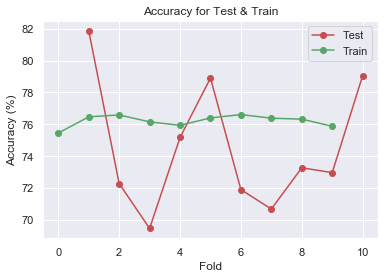

In [88]:
plt.plot(range(1,11),accuracy_test,'o-', color="r",label="Test")
plt.plot(accuracy_train, 'o-', color="g", label="Train")
plt.legend(loc="best")
plt.title("Accuracy for Test & Train")
plt.xlabel("Fold")
plt.ylabel("Accuracy (%)")
plt.show()

**Question - How does your model perform on the test set vs. the training set? The overall fit of the model, how to increase the accuracy (test, training)? Is it overfitting or underfitting? Why?**

The accuracy of test and train data were computed as 74.554% and 76.217% respectively. Strictly looking at the average accuracy of the test and train data we can conclude as follows:
* Considering that the average test accuracy is slightly lower than that of train data, the outcome may suggest that the model is slightly overfitted.
* The difference between average accuracy of test and train data is small. Therefore, we can argue that the model is well trained and fitted.
* Based on the bias and variance graph and grid search, we can say that the hyperparameters are optimal that allow for great balance between bias and variance.

However, if we examine individual fold, we can find that for the test accuracy, it varies with standard deviation of 5% which may not be a lot, but it still means that the test accuracy depends on which subset of the data are allocated in the test set

I would suspect that it's the higher salary classes like 150 - 300,000 and 300,000+ that our model cannot predict very well. The major reason is the imbalance in data. In the EDA section, we saw the significant right skewness (Higher counts for lower salary). Since the model didn't have enough data to make a good prediction on higher salary, it does not do a great job in predicting the high salary data. Since most of our data is the lower salary and since our model predicts the lower salary well, the results show high accuracy of 76% and 74%.

When train accuracy increases, the test accuracy drops and vice versa. This may be due to the fact that when more data points with high salary are allocated towards the test set, there is going to be less data points with high salary in train set resulting in lower accuracy on test set, but higher accuracy on train set.

Even though our model predicts the lower salary well, we have to say that the model is overfitted as it cannot predict the higher salaries very well as opposed to the lower salary.

Ways to increase the accuracy and achieve a better fitting model through applying the practices as follows:
* Work with balanced data (Undersampling the majority, oversampling the minority, or adding more data points)
* Reduce the complexity of the classification by reducing the number of classes
* Work with data from single country
* Try different classification methods or even machine learning
* Remove/minimize bias in our data (Examples can be removing students as they make our salary biased towards lower salary)